# SIT744 Assignment 1: Image Classification with Deep Feedforward Neural Network

<div class="alert-info">
    <p>Due: <strong>8:00 pm (AEST) 19 April 2021</strong>  (Monday)</p>


This is an <strong>individual</strong> assignment. It contributes <strong>30%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment1_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment1_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment1_solution.ipynp </li>
<li> 123456_assignment1_output.html</li>
</ul>
</p>

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions. (<em>Warning: Highly similar solutions will be investigated for collusion.</em>)</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided below, but the assignment will be marked by the overall quality per the above criteria. 
</p>
</div>

## Assignment objective



This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.

In this assignment, you are going to work with the Fashion-MNIST dataset for image recognition. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples in the visualization task below. 

This assignment consists of five tasks.


## Task 1 Load the data

*(weight ~5%)*

Load the Fashion MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). You may get the data via Keras (keras.datasets) or Tensorflow Datasets (tfds). 

In [1]:
import tensorflow as tf
import tensorflow_datasets
import math
import numpy as np

# Loading the data using tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Task 2 Understand the data

*(weight ~15%)*



25 images from the train set in the form of 5x5 matrix


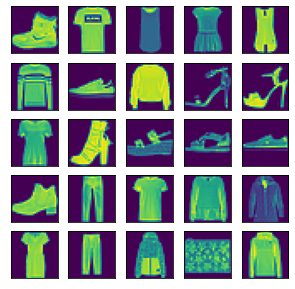

Data type of training data:  uint8
Shape of training data:  (60000, 28, 28)
Data type of training labels:  uint8
Shape of training labels:  (60000,)
Length of training data:  60000
Data type of test data:  uint8
Shape of test data:  (10000, 28, 28)
Data type of test labels:  uint8
Shape of test labels:  (10000,)
Length of test data:  10000
Labels  in the data:  [0 1 2 3 4 5 6 7 8 9]
Size of each image (28, 28)
Memory required for training data:  47040000 bytes

Plotting the numeric range of input: [0-255]


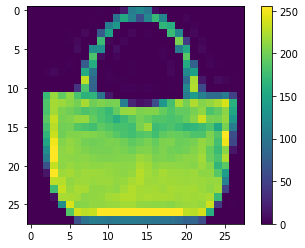

In [2]:
import matplotlib.pyplot as plt

# 25 images from the train set in the form of 5x5 matrix
print("25 images from the train set in the form of 5x5 matrix")
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

# training data
print("Data type of training data: ", train_images.dtype)
print("Shape of training data: ", train_images.shape)
print("Data type of training labels: ", train_labels.dtype)
print("Shape of training labels: ", train_labels.shape)
print("Length of training data: ", len(train_labels))

# test data
print("Data type of test data: ", test_images.dtype)
print("Shape of test data: ", test_images.shape)
print("Data type of test labels: ", test_labels.dtype)
print("Shape of test labels: ", test_labels.shape)
print("Length of test data: ", len(test_images))

# unique labels in the data
print("Labels  in the data: ", np.unique(test_labels))

# size of each image
print("Size of each image", train_images[0].shape)

# memory required for training data
print("Memory required for training data: ", train_images.size * train_images.itemsize, "bytes")


# plotting the numeric range of input
print("\nPlotting the numeric range of input: [0-255]")
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()


# The numeric range of input data is in the range [0,255], these values need to be normalized to the range [0,1]. 
# Normalisation ensures that each input parameter (pixel, in this case) has a similar data distribution. 
# This makes convergence faster while training the network.

# normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

Display 25 images from the train set in the form of 5x5 matrix.

Answer the following questions:

1. What are the data types and shapes of the features and the label? 
2. What are the unique labels in this dataset?
3. How many training images and how many test images?
4. What is the size of each image? How much memory is required for holding the whole training data.
5. Find out the numeric range of the input. Do we need to rescale the input? Why?
 

## Task 3 Construct an input pipeline

*(weight ~15%)*

Creat train/validate/test data splits and construct tf.data pipelines. Make sure that the training data is batched. 

- How do you determine the batch size?
- Do we need to shuffle the training data? If yes, how do you determine the buffer size?


In [3]:
# train, test and validation splits

# defining batch size
BATCH_SIZE = 512
# training dataset
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(BATCH_SIZE)


# test dataset
fmnist_test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
fmnist_test_ds = fmnist_test_ds.shuffle(5000).batch(BATCH_SIZE)

# picking out the validation set from the training dataset
fmnist_train = fmnist_train_ds.take(round(len(train_labels)*0.7))
fmnist_val = fmnist_train_ds.skip(round(len(train_labels)*0.7))


# batch size should be in powers of 2 and the larger the better, provided that the batch fits into the (GPU) memory;
# small batches can offer a regularizing effect, perhaps due to the noise they add to the learning process.
# larger batches provide a more accurate estimate of the gradient.
# the batch size here is 32.
# train-data shuffling ensures that the model gets to see all permutauions of input in every batch.



## Task 4 Construct a deep forward neural network

*(weight ~35%)*

### Task 4.1 Setting up a model for training

Construct a deep feedforward neural network. You need to decide and report the following configurations:

- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
- The loss function
- The metrics for model evaluation (which may be different from the loss function)
- The optimiser

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tools.

What is the number of trainable parameters in the model. Explain how the total number can be estimated from the model configurations.

In [4]:
# Different layers are appropriate for different tensor formats and different types of data processing. 
# Simple vector data, stored in 2D tensors of shape (samples, features), is often processed by densely connected layers.

# single-label, multiclass classification problem

# Layer-1: Flattening: Input Image: 28*28 = 784 pixels, gets converted into a 1D array;
# Layer-2: Dense layer: 128 units, relu allows the model to solve nonlinear problems;
# Layer-3: Output layer: 10 units, softmax provides probabilities for each possible output class, as this is a case of single-label, multiclass classification problem;


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [5]:
# Categorical crossentropy loss function is almost always suited for multiclass classification.
# It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
# Since, the labels here are encoded as integers, SparseCategoricalCrossentropy() is used.

# Accuracy works well to evaluate a classification model as the outputs are discreate labels.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

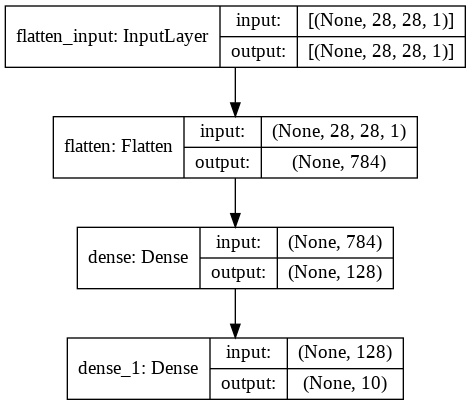

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [7]:
# saving the initial weights for later experiments
init_weights = model.get_weights()

### Task 4.2 Fitting the model

Before you fit the model. Think about what initialisation method have you chosen? If you did not specify the initialisation method, find out what is the default one. Choose a layer and visualise its initial weights. (Hint: You may use UMAP to visualise a collection of high-dimension vectors.)

Decide and report the following training setting:

1. The training batch size
2. The number of training epochs (at least 1,000 epochs recommended)
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Now fit the model. Show how the training loss changes. How did you decide when to stop training?

After fitting the model, visualise the model weights again. How did the weights change? Why?




In [8]:
tf.config.run_functions_eagerly(True)

model.fit(fmnist_train_ds, epochs=50, steps_per_epoch=math.ceil(len(train_labels)/BATCH_SIZE))

Epoch 1/50
118/118 [==============================] - 2s 14ms/step - loss: 0.9942 - accuracy: 0.6700
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 0.4711 - accuracy: 0.8413
Epoch 3/50
118/118 [==============================] - 2s 14ms/step - loss: 0.4256 - accuracy: 0.8536
Epoch 4/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3897 - accuracy: 0.8665
Epoch 5/50
118/118 [==============================] - 2s 13ms/step - loss: 0.3739 - accuracy: 0.8700
Epoch 6/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3526 - accuracy: 0.8758
Epoch 7/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3417 - accuracy: 0.8785
Epoch 8/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3326 - accuracy: 0.8803
Epoch 9/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3185 - accuracy: 0.8868
Epoch 10/50
118/118 [==============================] - 2s 14ms/step - loss: 0.3131 - accura

In [ ]:
history = model.fit(
    fmnist_train,
    validation_data=fmnist_val,
    epochs=1000, batch_size=128) 

Epoch 1/1000
  1/118 [..............................] - ETA: 4s - loss: 0.1644 - accuracy: 0.9355

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


### Task 4.3 Check the training using TensorBoard

Use TensorBoard to visualise the training process. Show screenshots of your TensorBoard output.

**Optional task:** Record the gradients during training and use TensorBoard to visualise the gradients.

In [ ]:
!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs"
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id)

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir,
        histogram_freq=1
    )
]


# reset the training
model.set_weights(init_weights)

history = model.fit(train_images, 
                      train_labels, 
                      epochs=20, 
                      batch_size=128,
                      callbacks=callbacks)

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=logs

In [ ]:
test_loss, test_accuracy = model.evaluate(fmnist_test_ds, steps=math.ceil(len(test_labels)/32))
print('Accuracy on test dataset:', test_accuracy)

## Task 5 Overfitting and regularisation

*(weight ~30%)*

Go back to the previous task. Plot the training and validation loss and accuracy. Answer the following questions:

1. Do you see overfitting or underfitting? Why?
2. If you see overfitting, at which epoch did it happen?

Now retrain the model with only 200 training examples. (Make sure that you  reinitialise the weights before retraining.) Do you see overfitting? How did the validation loss and accuracy change?

Neural networks are overparametrised models, meaning there can be more parameters than the training examples. Some form of regularisation is almost always necessary to obtain a useful model. Below are some options:

1. Add dropout
2. Add Batch Normalisation
3. Add layer-specific weight regularizations
4. Change the learning rate

In addition, you may also try changing the weight initialisation method.

Apply different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

Run **five or more** experiments of different training configurations and record the validation accuracy achieved in the Markdown table below. You may modify the table heading to match your experiment design.



|Dropout (rate)   | Batch Normalisation (Y/N)  | Optimiser  | Learning Rate  | Number of Epochs   |  Validation Accuracy |
|---|---|---|---|---|---|
|   |   |   |   |   |   |
|   |   |   |   |   |   |
|   |   |   |   |   |   |



Answer the following questions:

1. Which configuration achieved the best validation accuracy? Report the test accuracy of your final model.
2. Which setting had the most impact and which one had the least impact?

## Task 6 Generate HTML output

Use *nbconvert* to convert your completed notebook into an HTML file and name it **[YourID]_assingment1_output.html**.

---
**END OF ASSIGNMENT ONE**

